In [0]:
import pandas as pd
from pandas import Series
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
import numpy as np
# save np.load
# np_load_old = np.load

# modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

((X_train, y_train), (X_test, y_test)) = imdb.load_data(num_words=10000, maxlen=500)

# np.load = np_load_old

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D

In [0]:
X_train = pad_sequences(X_train, maxlen=500)

In [0]:
X_test = pad_sequences(X_test, maxlen=500)

In [0]:
X_train.shape

(25000, 500)

In [0]:
# load word embeddings into an Embedding layer
# note that we set trainable = True so as to keep the embeddings not fixed
embedding_layer = Embedding(10000,
                            128,
                            embeddings_regularizer='l2',
                            input_length=500,
                            trainable=True)

W0902 00:36:09.310712 140696410318720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25000, 500) (20947, 500) (25000,) (20947,)


In [0]:
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout
# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(500,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(256, 2, activation='relu')(embedded_sequences)
#x = MaxPooling1D(2)(x)
#x = Conv1D(128, 2, activation='relu')(x)
#x = MaxPooling1D(2)(x)
# x = Conv1D(32, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
#x = Flatten(data_format=None)(x)
x = Dropout(0.5)(x)
#x = Dense(128, activation='relu')(x)
preds = Dense(1, activation='sigmoid')(x)

model = Model(sequence_input, preds)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer='rmsprop', loss='mean_absolute_error')
history = model.fit(X_train, y_train, batch_size=1024, epochs=30, validation_data=(X_test, y_test))

W0902 00:36:09.989724 140696410318720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 00:36:10.003116 140696410318720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0902 00:36:10.046375 140696410318720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0902 00:36:10.053664 140696410318720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins

Train on 25000 samples, validate on 20947 samples
Epoch 1/30
25000/25000 [==============================] - 11s 433us/step - loss: 6.0839 - acc: 0.5700 - val_loss: 2.3157 - val_acc: 0.6032
Epoch 2/30
25000/25000 [==============================] - 3s 129us/step - loss: 1.2920 - acc: 0.6765 - val_loss: 0.7088 - val_acc: 0.7188
Epoch 3/30
25000/25000 [==============================] - 3s 130us/step - loss: 0.6024 - acc: 0.7424 - val_loss: 0.5242 - val_acc: 0.7772
Epoch 4/30
25000/25000 [==============================] - 3s 129us/step - loss: 0.5054 - acc: 0.7880 - val_loss: 0.4778 - val_acc: 0.8057
Epoch 5/30
25000/25000 [==============================] - 3s 129us/step - loss: 0.4710 - acc: 0.8062 - val_loss: 0.4519 - val_acc: 0.8195
Epoch 6/30
25000/25000 [==============================] - 3s 130us/step - loss: 0.4467 - acc: 0.8191 - val_loss: 0.4355 - val_acc: 0.8295
Epoch 7/30
25000/25000 [==============================] - 3s 130us/step - loss: 0.4299 - acc: 0.8332 - val_loss: 0.4237 -

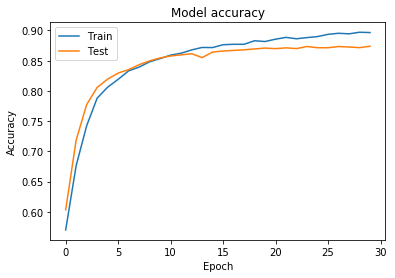

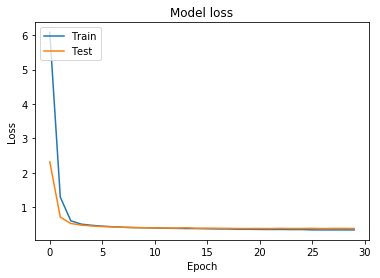

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [0]:
def ScoreModel(embedding_dim, embedding_reg, num_conv_layers, num_fc_layers, batch_size, X_train, y_train, X_test, y_test):
  embedding_layer = Embedding(10000,
                              embedding_dim,
                              embeddings_regularizer=embedding_reg,
                              input_length=500,
                              trainable=True)
  sequence_input = Input(shape=(500,), dtype='int32')
  x = embedding_layer(sequence_input)
  for i in range(num_conv_layers):
    x = Conv1D(256, 2, activation='relu')(x)
    x = MaxPooling1D(2)(x)

  x = GlobalMaxPooling1D()(x)
#  x = Flatten()(x)
  for i in range(num_fc_layers):
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
  x = Dropout(0.5)(x)

  #x = Dense(128, activation='relu')(x)
  preds = Dense(1, activation='sigmoid')(x)

  model = Model(sequence_input, preds)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
  #model.compile(optimizer='rmsprop', loss='mean_absolute_error')
  history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test, y_test), verbose=0)
  return history.history['val_acc'][-1]

In [0]:
from sklearn.model_selection import KFold

best_score = 0
best_params = {}

for embedding_dim in [64, 128]:
  for embedding_reg in [None, 'l2']:
    for num_conv_layers in [1, 2]:
      for num_fc_layers in [0, 1]:
        for batch_size in [64, 256]:
          cv = KFold(5)
          sum_score = 0
          params = {'embedding_dim': embedding_dim,
                    'embedding_reg': embedding_reg,
                    'num_conv_layers': num_conv_layers,
                    'num_fc_layers': num_fc_layers,
                    'batch_size': batch_size}
          print("running cv for params: {}".format(params))
          for train_idx, test_idx in cv.split(X_train):
            x_train_cv = X_train[train_idx]
            y_train_cv = y_train[train_idx]
            x_test_cv = X_train[test_idx]
            y_test_cv = y_train[test_idx]
            score = ScoreModel(embedding_dim=embedding_dim, 
                              embedding_reg=embedding_reg, 
                              num_conv_layers=num_conv_layers,
                              num_fc_layers=num_fc_layers,
                              batch_size=batch_size,
                              X_train=x_train_cv,
                              y_train=y_train_cv,
                              X_test=x_test_cv,
                              y_test=y_test_cv)
            sum_score += score
          mean_score = sum_score / 5
          print("avg score: {}".format(mean_score))
          if mean_score > best_score:
            best_score = mean_score
            best_params = params

print("DONE, best score: {}; best params: {}".format(best_score, best_params))

W0902 00:39:10.802697 140696410318720 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



running cv for params: {'embedding_dim': 64, 'embedding_reg': None, 'num_conv_layers': 1, 'num_fc_layers': 0, 'batch_size': 64}
avg score: 0.85992
running cv for params: {'embedding_dim': 64, 'embedding_reg': None, 'num_conv_layers': 1, 'num_fc_layers': 0, 'batch_size': 256}
avg score: 0.8639600001907348
running cv for params: {'embedding_dim': 64, 'embedding_reg': None, 'num_conv_layers': 1, 'num_fc_layers': 1, 'batch_size': 64}
avg score: 0.8692400000000001
running cv for params: {'embedding_dim': 64, 'embedding_reg': None, 'num_conv_layers': 1, 'num_fc_layers': 1, 'batch_size': 256}
avg score: 0.8714799998474121
running cv for params: {'embedding_dim': 64, 'embedding_reg': None, 'num_conv_layers': 2, 'num_fc_layers': 0, 'batch_size': 64}
avg score: 0.85448
running cv for params: {'embedding_dim': 64, 'embedding_reg': None, 'num_conv_layers': 2, 'num_fc_layers': 0, 'batch_size': 256}
avg score: 0.8462400000762939
running cv for params: {'embedding_dim': 64, 'embedding_reg': None, 'nu

The best parameters are : 
"Embedding dimension" : 128
"Embedding Regularizer" : None
"Number of Conv layers" : 1
"Number of FC layers" : 1
"Batch_size" : 256